In [5]:
import json
with open('lmgearnet_pipeline.json', 'r') as f:
    data = json.load(f)


at 3, 0, 0: {'micro_auroc': 0.8662207126617432, 'mcc': 0.39865582455339105}
at 3, 0, 1: {'micro_auroc': 0.8693806529045105, 'mcc': 0.36567197554348974}
at 3, 0, 2: {'micro_auroc': 0.8554527163505554, 'mcc': 0.3355947988067687}
at 3, 1, 0: {'micro_auroc': 0.9198501706123352, 'mcc': 0.49323682628700855}
at 3, 1, 1: {'micro_auroc': 0.9154717326164246, 'mcc': 0.5118924311478781}
at 3, 1, 2: {'micro_auroc': 0.8845252990722656, 'mcc': 0.3242845289963117}
at 4, 0, 0: {'micro_auroc': 0.865037202835083, 'mcc': 0.3506238638329026}
at 4, 0, 1: {'micro_auroc': 0.8670470118522644, 'mcc': 0.37591192237673243}
at 4, 0, 2: {'micro_auroc': 0.8552563786506653, 'mcc': 0.41119354535284447}
at 4, 1, 0: {'micro_auroc': 0.9189677834510803, 'mcc': 0.49035015112151636}
at 4, 1, 1: {'micro_auroc': 0.9114110469818115, 'mcc': 0.47590853360179186}
at 4, 1, 2: {'micro_auroc': 0.9113872051239014, 'mcc': 0.4865544174577911}
at 5, 0, 0: {'micro_auroc': 0.8665546178817749, 'mcc': 0.39196613141596004}
at 5, 0, 1: {'micr

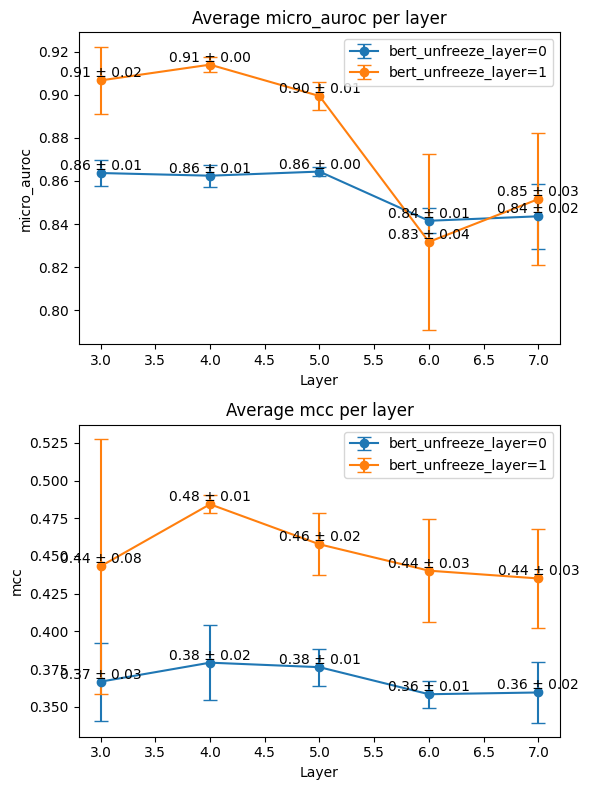

In [10]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

layers = list(range(3, 8))

avg_metrics = {0: {'micro_auroc': [], 'mcc': []}, 1: {'micro_auroc': [], 'mcc': []}}
std_metrics = {0: {'micro_auroc': [], 'mcc': []}, 1: {'micro_auroc': [], 'mcc': []}}

for gearnet_hidden_dim_count in layers:
    layer_data_root = [
        d for d in data if d['gearnet_hidden_dim_count'] == gearnet_hidden_dim_count]
    
    for bert_unfreeze_layer in range(2):
        metrics = {'micro_auroc': [], 'mcc': []}
        layer_data = [d for d in layer_data_root if d['bert_unfreeze_layer'] == bert_unfreeze_layer]
        for trial in np.unique([d['trial'] for d in layer_data]):
            trial_data = [d for d in layer_data if d['trial'] == trial]
            last_epoch_metric = trial_data[-1]['data']
            print(f'at {gearnet_hidden_dim_count}, {bert_unfreeze_layer}, {trial}: {last_epoch_metric}')

            metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
            metrics['mcc'].append(last_epoch_metric['mcc'])

        avg_metrics[bert_unfreeze_layer]['micro_auroc'].append(np.mean(metrics['micro_auroc']))
        avg_metrics[bert_unfreeze_layer]['mcc'].append(np.mean(metrics['mcc']))
        std_metrics[bert_unfreeze_layer]['micro_auroc'].append(np.std(metrics['micro_auroc']))
        std_metrics[bert_unfreeze_layer]['mcc'].append(np.std(metrics['mcc']))

# Plotting
fig, axs = plt.subplots(2, figsize=(6, 8))

# micro_auroc plot
for bert_unfreeze_layer in range(2):
    axs[0].errorbar(layers, avg_metrics[bert_unfreeze_layer]['micro_auroc'],
                    yerr=std_metrics[bert_unfreeze_layer]['micro_auroc'], fmt='-o', capsize=5,
                    label=f'bert_unfreeze_layer={bert_unfreeze_layer}')
    
    for layer, avg, std in zip(layers, avg_metrics[bert_unfreeze_layer]['micro_auroc'], std_metrics[bert_unfreeze_layer]['micro_auroc']):
        axs[0].text(layer, avg, '%.2f ± %.2f' %
                    (avg, std), ha='center', va='bottom')
axs[0].set_title('Average micro_auroc per layer')
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('micro_auroc')
axs[0].legend()



# mcc plot
for bert_unfreeze_layer in range(2):
    axs[1].errorbar(layers, avg_metrics[bert_unfreeze_layer]['mcc'],
                    yerr=std_metrics[bert_unfreeze_layer]['mcc'], fmt='-o', capsize=5,
                    label=f'bert_unfreeze_layer={bert_unfreeze_layer}')
    # Add labels to mcc data points
    for layer, avg, std in zip(layers, avg_metrics[bert_unfreeze_layer]['mcc'], std_metrics[bert_unfreeze_layer]['mcc']):
        axs[1].text(layer, avg, '%.2f ± %.2f' %
                    (avg, std), ha='center', va='bottom')

axs[1].set_title('Average mcc per layer')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('mcc')
axs[1].legend()


plt.tight_layout()
plt.show()
